Supervised preprocessing and visualization

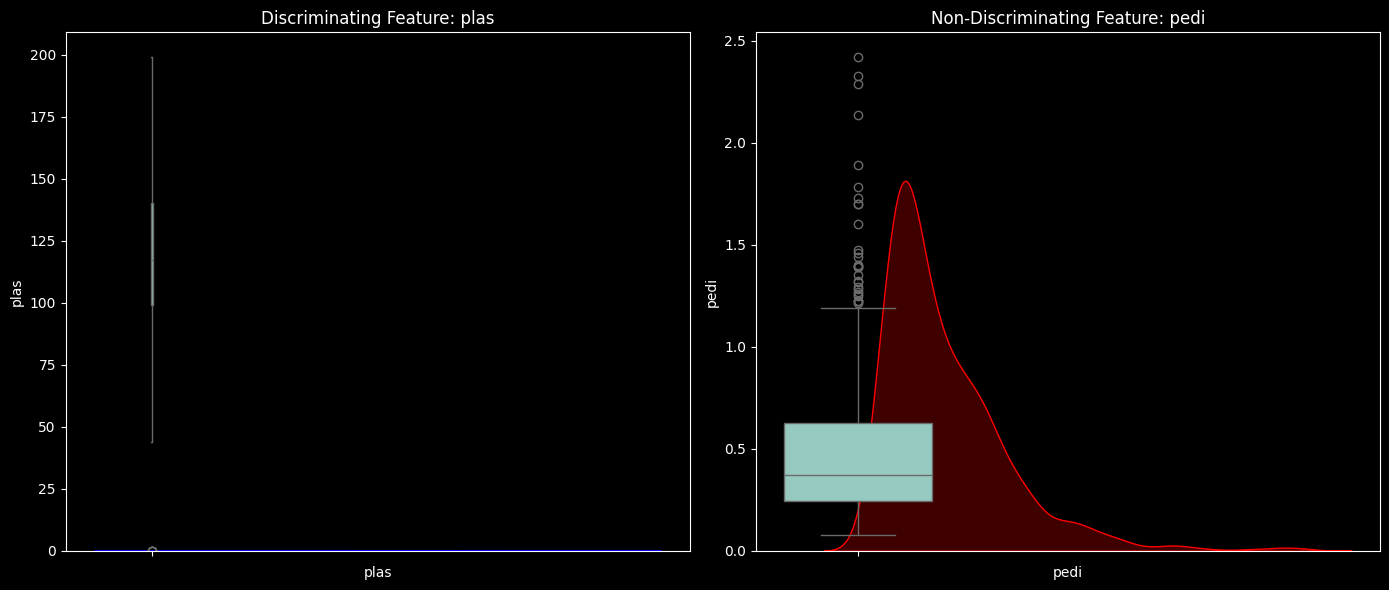

In [53]:
# Importiere Bibliotheken
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Datensatz laden
data = pd.read_csv("C:\\Users\\sonja\\Downloads\\diabetes.csv")  

# Definition einer IQR-basierten Ausreißer-Erkennungsfunktion, die nur numerische Spalten berücksichtigt
def iqr_outlier_detection(df):
    # nur numerische spalten
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Berechne Q1 (25 %) und Q3 (75%) für jede spalte
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    
    # Definiere Outliers
    outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
    
    # Ersetze outliers mit NaN
    df_numeric[outliers] = np.nan
    return df

# Ausreißererkennung anwenden und durch NaN ersetzen
data_no_outliers = iqr_outlier_detection(data.copy())

# verwerfe Zeilen mit NaN werten
data_no_outliers_clean = data_no_outliers.dropna()

# Merkmale einstufen
from sklearn.feature_selection import mutual_info_classif

# die Zielvariable ist „class“ und die Merkmale sind alle anderen Spalten
X = data_no_outliers_clean.drop(columns=['class'])
y = data_no_outliers_clean['class']

# Berechnung des Informationsgewinns 
ig_scores = mutual_info_classif(X, y)

# Erstellen Sie einen DataFrame mit den Namen der Merkmale und den entsprechenden Werten für den Informationsgewinn
ig_df = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': ig_scores
})

# Sortieren Sie die Merkmale nach ihrer Bewertung des Informationsgewinns
ig_df_sorted = ig_df.sort_values(by='Information Gain', ascending=False)

# Erstellen Sie Boxplots und Verteilungsdiagramme für ein diskriminierendes und ein nicht-diskriminierendes Merkmal.
# Ermitteln Sie die Merkmale mit der höchsten und niedrigsten IG-Bewertung.
highest_ig_feature = ig_df_sorted.iloc[0]['Feature']
lowest_ig_feature = ig_df_sorted.iloc[-1]['Feature']

# Extrahieren von Daten für die diskriminierenden und nicht-diskriminierenden Merkmale
discriminating_data = data_no_outliers_clean[highest_ig_feature]
non_discriminating_data = data_no_outliers_clean[lowest_ig_feature]

# plot 
plt.figure(figsize=(14, 6))

# Boxplot und Distribution Plot für das discriminating Feature
plt.subplot(1, 2, 1)
sns.boxplot(data=discriminating_data)
sns.kdeplot(discriminating_data, color='blue', fill=True)  # Ersetze `shade=True` durch `fill=True`
plt.title(f"Discriminating Feature: {highest_ig_feature}")
plt.xlabel(highest_ig_feature)

# Boxplot und Distribution Plot für das non-discriminating Feature
plt.subplot(1, 2, 2)
sns.boxplot(data=non_discriminating_data)
sns.kdeplot(non_discriminating_data, color='red', fill=True)  # Ersetze `shade=True` durch `fill=True`
plt.title(f"Non-Discriminating Feature: {lowest_ig_feature}")
plt.xlabel(lowest_ig_feature)


# gebe die Plots aus
plt.tight_layout()
plt.show()
